In [17]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('hh_6.csv',encoding='cp1252')
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))



C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.PE_Converted.value_counts()
df = df[['AG_Active_Ind',
 'AG_API',
 'AG_Policy_Count',
 'AG_Tenure',
 'AS_Level',
 'AG_Unit',
 'AG_Sales_Zone',
 'AG_Province_Code',
 'AG_GAdump_segment',
 'AG_Gender_Grp',
 'AG_Education',
 'AG_Marital_Status_Grp',
 'AG_Age_Join',
 'AG_Age_Join_Grp',
 'Ag_Occupation_Grp',
 'AG_Cat_After6mth',
 'PE_Converted',
 'AG_APE_L6M',
 'AG_Policy_L6M',
 'Ag_Active_L3M',
 'Ag_Active_L6M']]

In [4]:
df.describe()

,AG_Active_Ind,AG_API,AG_Policy_Count,AG_Tenure,AG_Age_Join,AG_APE_L6M,AG_Policy_L6M,Ag_Active_L3M,Ag_Active_L6M
count,172177.000000,1.721770e+05,172177.000000,172177.000000,172177.000000,1.721770e+05,172177.000000,155831.000000,155831.000000
mean,0.397916,7.818692e+06,0.570541,0.232305,38.202123,1.818696e+07,1.294804,0.148937,0.763359
std,0.489469,1.513823e+07,1.011755,0.228922,11.662101,5.411691e+07,3.446169,0.520271,1.153578
min,0.000000,0.000000e+00,0.000000,0.000000,18.000000,-9.832770e+07,-1.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,28.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.200000,36.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,1.000000,1.239460e+07,1.000000,0.400000,48.000000,1.401750e+07,1.000000,0.000000,1.000000
max,1.000000,6.502617e+08,40.000000,1.000000,78.000000,3.300407e+09,147.000000,3.000000,6.000000


In [5]:

df_nonpe = df[df.PE_Converted == 'Non-PE']

In [6]:
df_pe = df[df.PE_Converted == 'PE Converted']

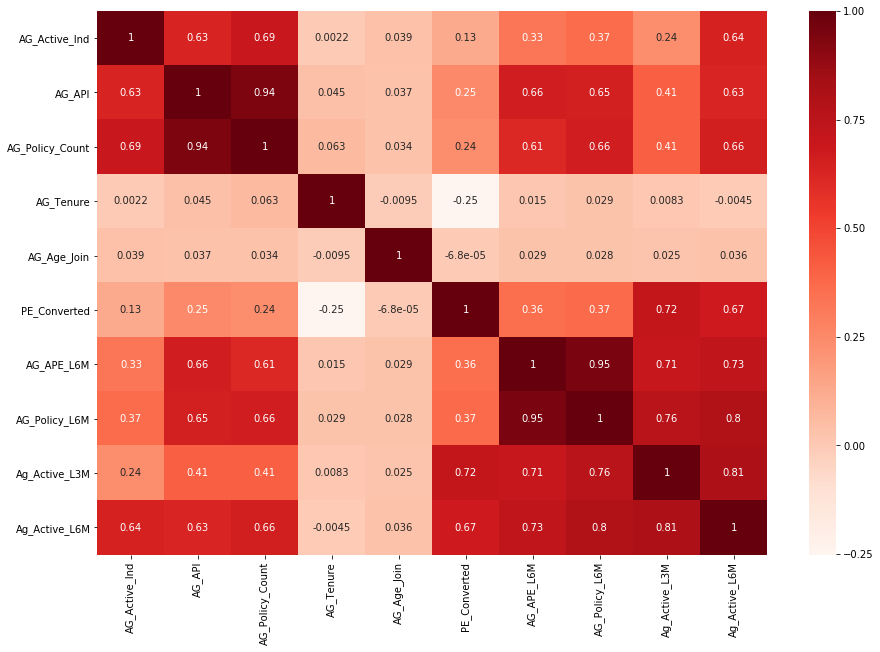

In [11]:
df['PE_Converted'] = pd.get_dummies(df['PE_Converted'])
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
df[df.columns].corr()['AG_Active_Ind'][:]

AG_Active_Ind      1.000000
AG_API             0.634993
AG_Policy_Count    0.693318
AG_Tenure          0.002214
AG_Age_Join        0.038874
PE_Converted       0.127144
AG_APE_L6M         0.330367
AG_Policy_L6M      0.366789
Ag_Active_L3M      0.236380
Ag_Active_L6M      0.640012
Name: AG_Active_Ind, dtype: float64

In [13]:
df[df.columns].corr()['PE_Converted'][:]

AG_Active_Ind      0.127144
AG_API             0.250997
AG_Policy_Count    0.237240
AG_Tenure         -0.251040
AG_Age_Join       -0.000068
PE_Converted       1.000000
AG_APE_L6M         0.359518
AG_Policy_L6M      0.370472
Ag_Active_L3M      0.723119
Ag_Active_L6M      0.674652
Name: PE_Converted, dtype: float64

In [14]:
corr_matrix = df.corr()
print(corr_matrix["PE_Converted"].sort_values(ascending=False))

PE_Converted       1.000000
Ag_Active_L3M      0.723119
Ag_Active_L6M      0.674652
AG_Policy_L6M      0.370472
AG_APE_L6M         0.359518
AG_API             0.250997
AG_Policy_Count    0.237240
AG_Active_Ind      0.127144
AG_Age_Join       -0.000068
AG_Tenure         -0.251040
Name: PE_Converted, dtype: float64


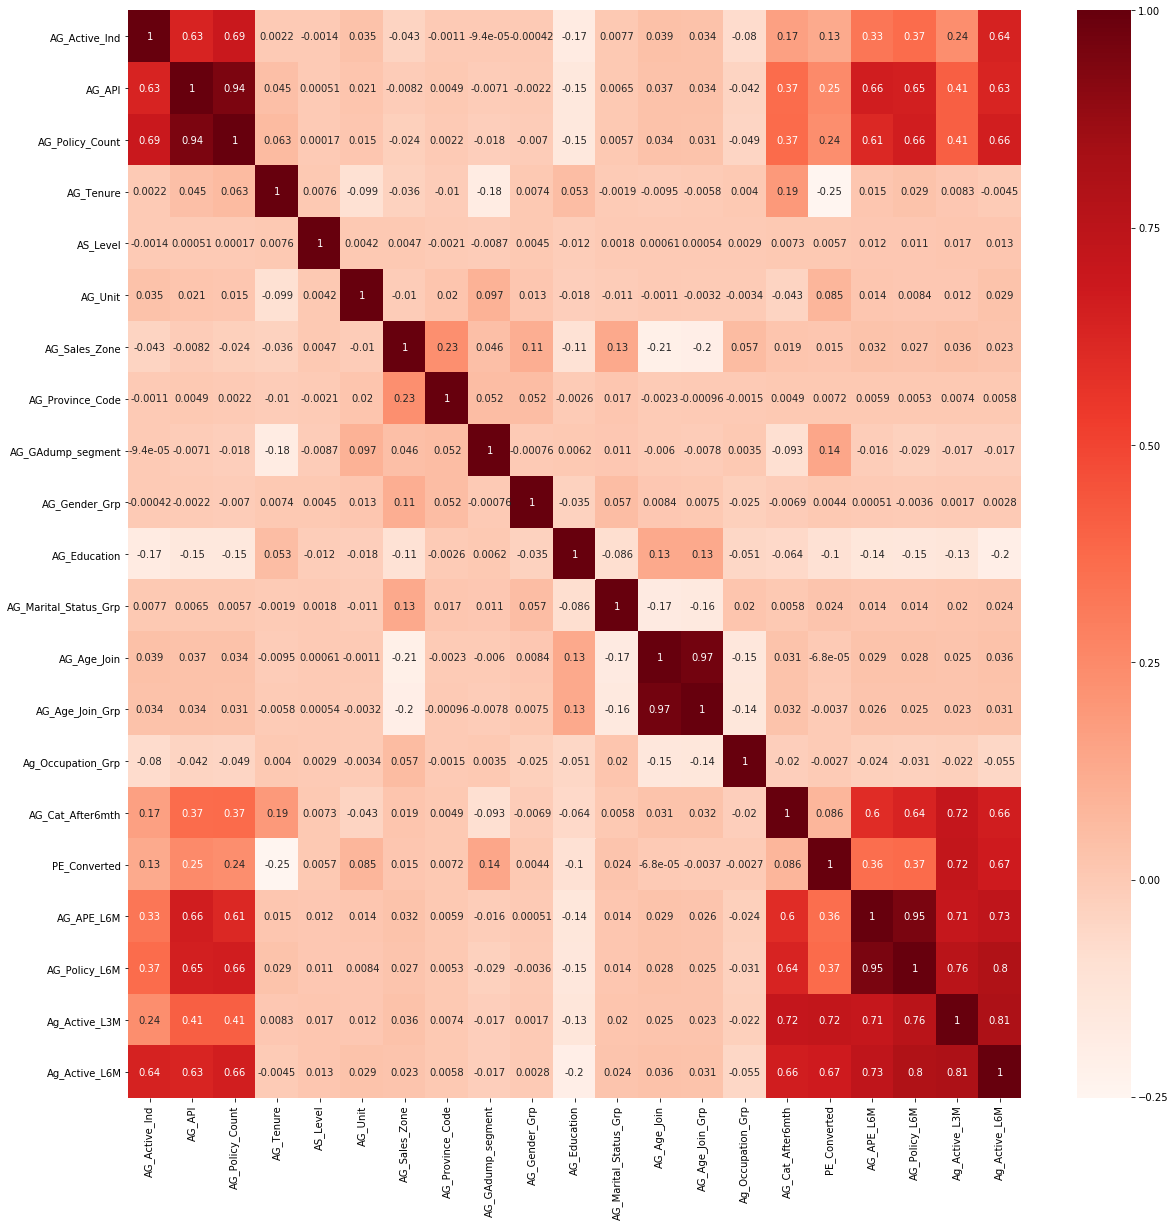

In [15]:
df[df.select_dtypes(['category']).columns] = df.select_dtypes(['category']).apply(lambda x: x.cat.codes)

#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [16]:
df.PE_Converted.value_counts()

0    149223
1     22954
Name: PE_Converted, dtype: int64

In [ ]:



# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

In [18]:
list(df)

['AG_Active_Ind',
 'AG_API',
 'AG_Policy_Count',
 'AG_Tenure',
 'AS_Level',
 'AG_Unit',
 'AG_Sales_Zone',
 'AG_Province_Code',
 'AG_GAdump_segment',
 'AG_Gender_Grp',
 'AG_Education',
 'AG_Marital_Status_Grp',
 'AG_Age_Join',
 'AG_Age_Join_Grp',
 'Ag_Occupation_Grp',
 'AG_Cat_After6mth',
 'PE_Converted',
 'AG_APE_L6M',
 'AG_Policy_L6M',
 'Ag_Active_L3M',
 'Ag_Active_L6M']

In [19]:
df_pe

,AG_Active_Ind,AG_API,AG_Policy_Count,AG_Tenure,AS_Level,AG_Unit,AG_Sales_Zone,AG_Province_Code,AG_GAdump_segment,AG_Gender_Grp,...,AG_Marital_Status_Grp,AG_Age_Join,AG_Age_Join_Grp,Ag_Occupation_Grp,AG_Cat_After6mth,PE_Converted,AG_APE_L6M,AG_Policy_L6M,Ag_Active_L3M,Ag_Active_L6M
3,1,13505900,1.0,0.07,AG,Z07,01_NOR,04,Platinum,Female,...,Married,45,04.41-50,White-collar,Gold,PE Converted,109859200,4.0,1.0,2.0
4,0,0,0.0,0.03,AG,MM5,01_NOR,04,Gold,Male,...,Married,39,03.31-40,Undeclared,Gold,PE Converted,286537500,18.0,2.0,3.0
5,0,0,0.0,0.17,AG,E67,01_NOR,04,Gold,Female,...,Married,38,03.31-40,White-collar,Gold,PE Converted,164268300,10.0,2.0,4.0
38,1,30878400,2.0,0.80,AG,FTK,04_SOU,08,Platinum,Female,...,Married,40,03.31-40,White-collar,Gold,PE Converted,222171300,10.0,2.0,5.0
45,1,56932000,4.0,0.23,AG,L21,04_SOU,08,Gold,Female,...,Married,49,04.41-50,Small-biz/Shop owners,Gold,PE Converted,212401400,20.0,3.0,6.0
70,1,78364100,6.0,0.83,AG,JIZ,04_SOU,08,Diamond,Female,...,Married,36,03.31-40,Small-biz/Shop owners,Gold,PE Converted,93740700,8.0,0.0,3.0
87,1,33590200,2.0,0.83,AG,DA4,01_NOR,33,Platinum,Female,...,Married,50,04.41-50,"Sales (Insurance, Real estate)",Gold,PE Converted,294023000,10.0,2.0,4.0
96,1,16491200,1.0,0.47,AG,C9M,01_NOR,33,Platinum,Female,...,Married,39,03.31-40,"Sales (Insurance, Real estate)",Diamond,PE Converted,995247100,62.0,3.0,6.0
122,1,4321800,1.0,0.00,AG,BK5,03_SCE,58,Silver,Female,...,Married,53,05.51-60,"Sales (Insurance, Real estate)",Gold,PE Converted,157011700,11.0,2.0,5.0
126,1,11556200,1.0,0.23,AG,EA0,01_NOR,38,Platinum,Female,...,Married,62,06.61-70,Farmers,Gold,PE Converted,90601400,6.0,1.0,2.0
